In [1]:
from time import time
import os
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

from kmerlib.running_window import *
from kmerlib.spectrum import *
from kmerlib.tools import *
from utils.term_colors import *

import json

# plot config
sns.set()

In [13]:
with open("./data/genes_dataset/5_genes_all_orgs.json", "r") as f:
    all_genes = json.load(f)

In [14]:
len(all_genes)

395

In [44]:
# Predictions
def prediction(k):
    ref_data = list()
    for type_ in ("bacteria", "archaea"):
        path = Path("./data") / type_
        species = os.listdir(str(path))
        for name in species:
            file_name = "{}_k00{}.json".format(name, k)
            spec_path = path / name / file_name
            ref_data.append({
                "type": type_,
                "name": name,
                "spec": Spectrum(str(spec_path), True)
            })

    all_genes_comp = list()

    for gene in all_genes:
        type_ = all_genes[gene]['Clade']
        name = all_genes[gene]['Organism']
        all_genes_comp.append({
            "type": type_,
            "name": name,
            "spec": Spectrum(all_genes[gene]['Spectrums'][str(k)])
        })

    rslts = list()
    ranks = list()
    N = len(all_genes_comp)
    for i, gene in enumerate(all_genes_comp):
        spec = gene["spec"]
        target = gene["name"]
        d = list()
        for org in ref_data:
            ref_spec = org["spec"]
            d.append((dist(ref_spec, spec), org["name"]))
        key = lambda x: x[0]
        d.sort(key=key)
        if d[0][1] == target:
            rslts.append(1)
        else:
            rslts.append(0)
        names = [n for _, n in d]
        ranks.append(names.index(target) + 1)

    print("K={} | Accuracy: {}/{} ({:.2%}) | Mean rank: {:.2f} ±{:.2f}".format(k, sum(rslts), N, sum(rslts)/N,
                                                                               np.mean(ranks), np.std(ranks)))
    
    return sum(rslts)/N, np.mean(ranks)

In [ ]:
pers = list()
ranks = list()
Ks = (2, 3, 4, 5, 6)
for k in Ks:
    per, rank = prediction(k)
    pers.append(per)
    ranks.append(rank)


2
K=2 | Accuracy: 138/395 (34.94%) | Mean rank: 7.40 ±11.73
3
K=3 | Accuracy: 193/395 (48.86%) | Mean rank: 5.23 ±10.46
4
K=4 | Accuracy: 251/395 (63.54%) | Mean rank: 4.16 ±9.96
5


Text(0,0.5,'Accuracy')

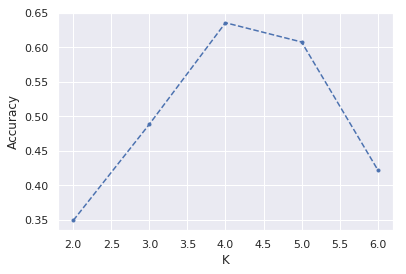

In [41]:
plt.plot(Ks, pers, '.--')
plt.xlabel("K")
plt.ylabel("Accuracy")

Text(0,0.5,'Rank')

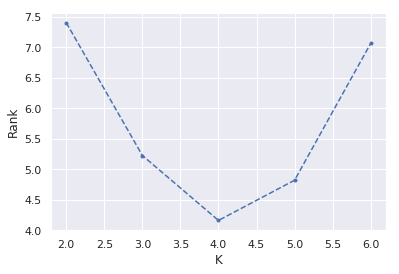

In [43]:
plt.plot(Ks, ranks, '.--')
plt.xlabel("K")
plt.ylabel("Rank")

In [33]:
prediction(5)

K=5 | Accuracy: 240/395 (60.76%) | Mean rank: 4.82 ±10.39
